### Zadanie: pingwiny!
Wykorzystaj zbiór penguins.csv (pobierz), w którym są cechy dla różnych gatunków pingwinów, wykonaj eksploracje, a następnie naucz poznane w tym module modele.

In [232]:
import pandas as pd
penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [233]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [234]:
penguins.dropna(inplace=True)

In [235]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


In [236]:
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

In [237]:
pd.Series(y).value_counts(normalize=True)

0    0.441520
1    0.359649
2    0.198830
Name: Species, dtype: float64

In [238]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Unique values: 164


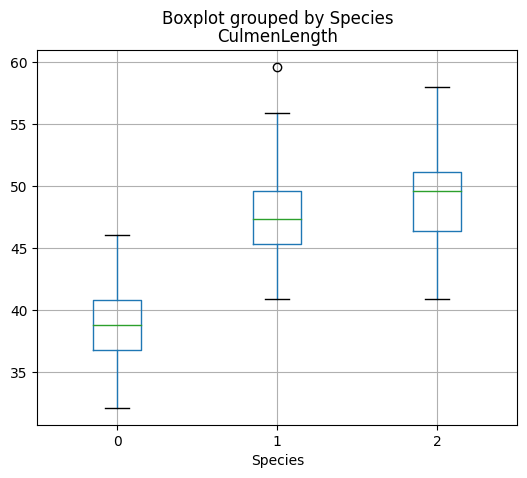

Unique values: 80


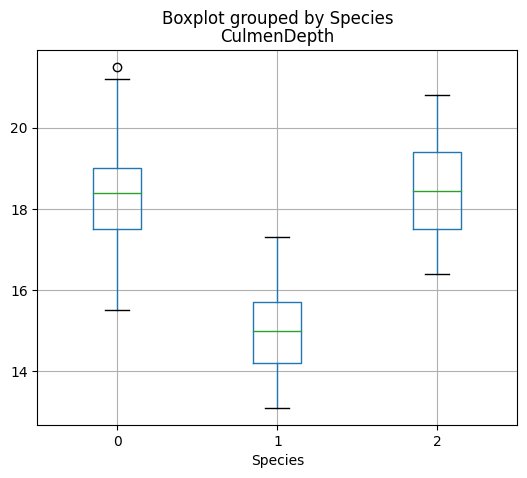

Unique values: 55


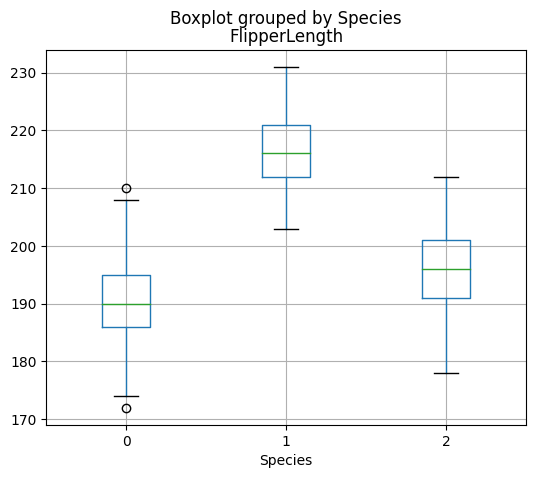

Unique values: 94


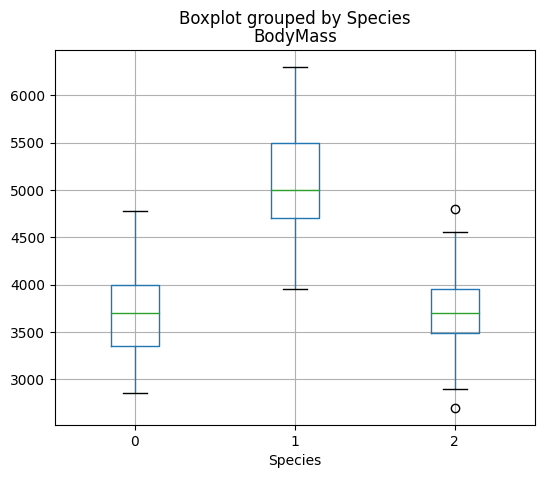

In [239]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

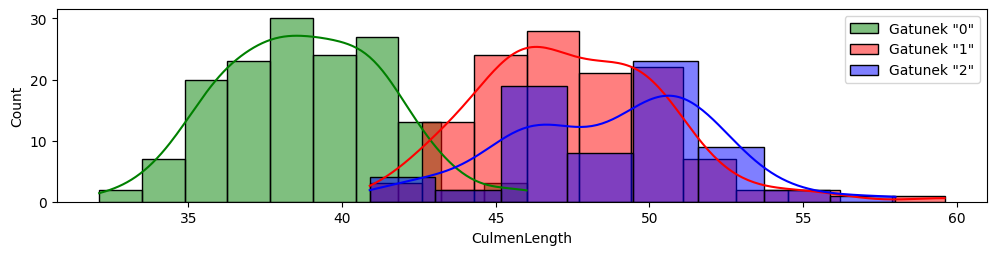

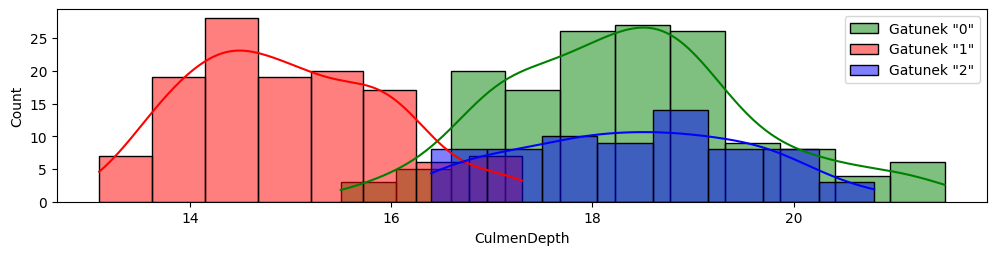

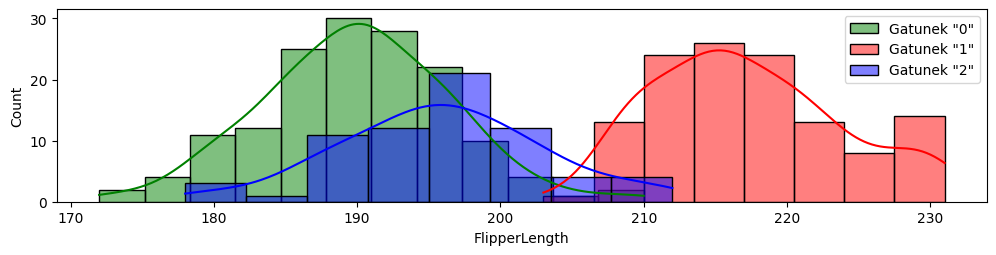

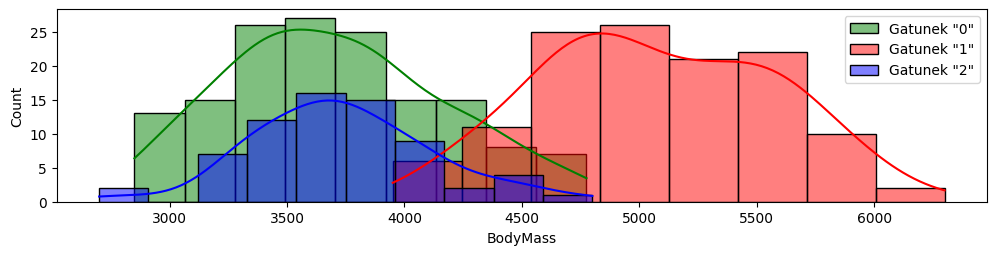

In [240]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Gatunek "0"')
    sns.histplot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='Gatunek "1"')
    sns.histplot(penguins.loc[penguins['Species']==2, col], kde=True, color='blue', label='Gatunek "2"')
    plt.legend(loc='upper right')
    plt.show()

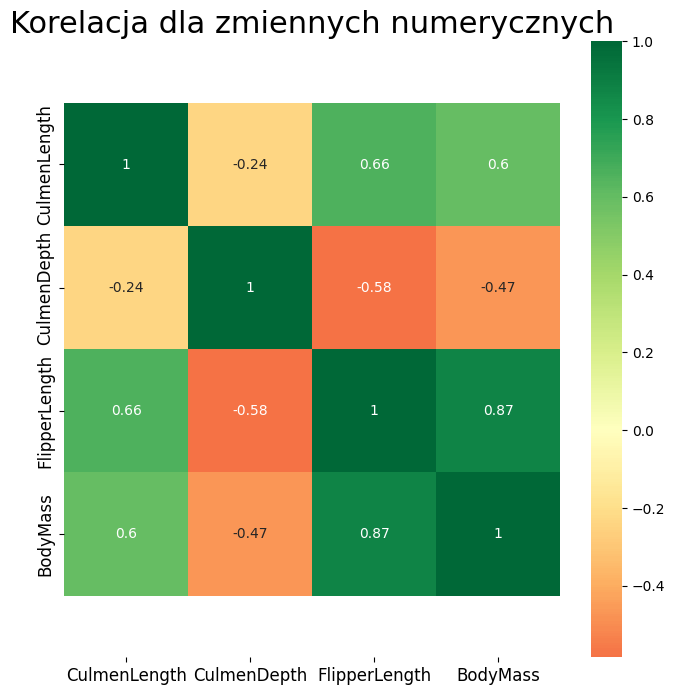

In [241]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [242]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.779857
FlipperLength    0.357472
BodyMass         0.209717
CulmenDepth     -0.183090
dtype: float64

In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['CulmenLength', 'FlipperLength']], 
                                y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], 
                                                            X_test.shape[0]))

Treningowe obserwacje: 239
Testowe obserwacje: 103


In [293]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid, )

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(3):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, 
                    label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

In [245]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # # plot ROC curve
    # fig = plt.figure(figsize=(6, 6))
    # plt.plot([0, 1], [0, 1], 'k--')
    # for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
    #     fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
    #     plt.plot(fpr, tpr, label=name_selected)
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve')
    # plt.legend(loc='lower right')
    # plt.show()

    # f1_metric = f1_score(y_checked, predictions)
    # auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    # metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
    #                                              ignore_index=True)
    # return metrics_dataframe

### Logistic Regression

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

C:\Users\magda\AppData\Local\Temp\ipykernel_8316\4058567073.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


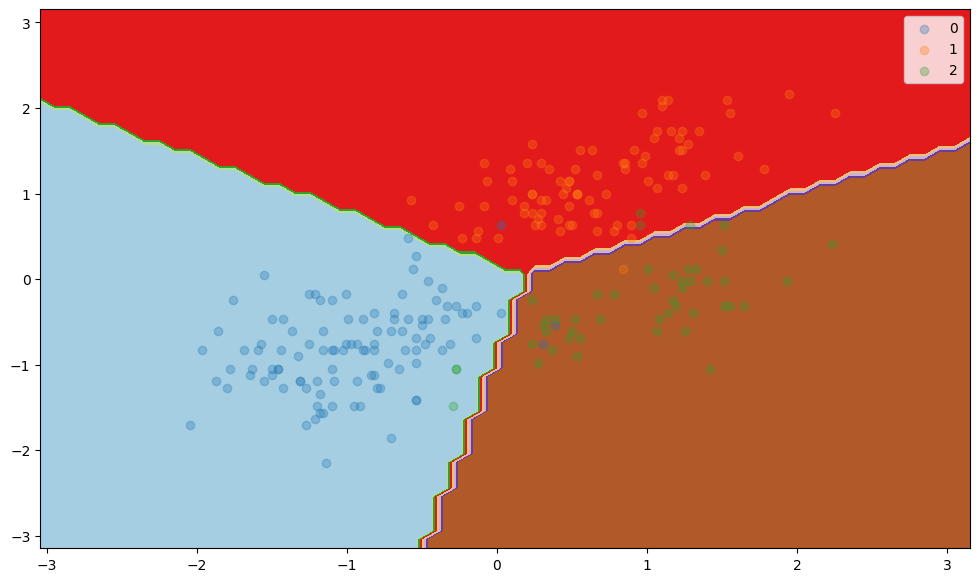

In [294]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_lr)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



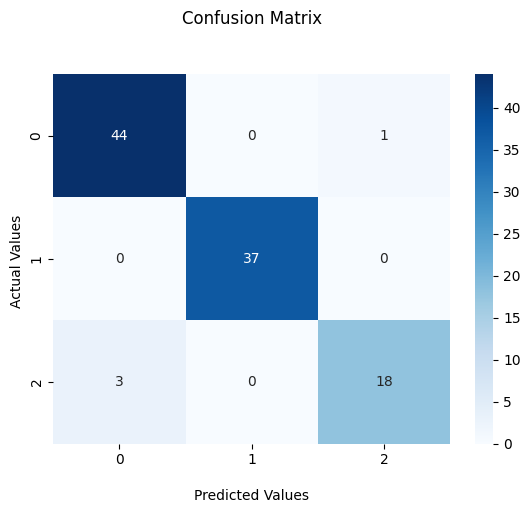

In [248]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

In [260]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
random_knn = KNeighborsClassifier()
params_knn = {'n_neighbors': [1, 3, 5, 10, 20, 50]}
knn_gridsearch = GridSearchCV(random_knn,
                             params_knn,
                             )
knn_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', knn_gridsearch.best_params_)
model_knn_v2 = knn_gridsearch.best_estimator_


Best hyperparameter: {'n_neighbors': 3}


In [265]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_standardized, y_train)

KNeighborsClassifier(n_neighbors=3)

C:\Users\magda\AppData\Local\Temp\ipykernel_8316\4058567073.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


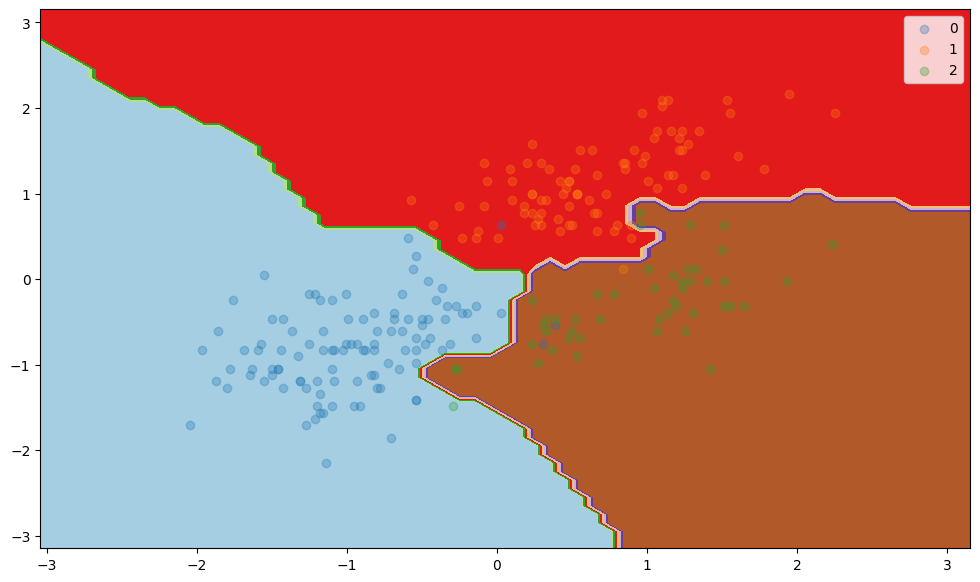

In [295]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_knn)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      0.97      0.99        37
           2       0.90      0.90      0.90        21

    accuracy                           0.96       103
   macro avg       0.95      0.95      0.95       103
weighted avg       0.96      0.96      0.96       103



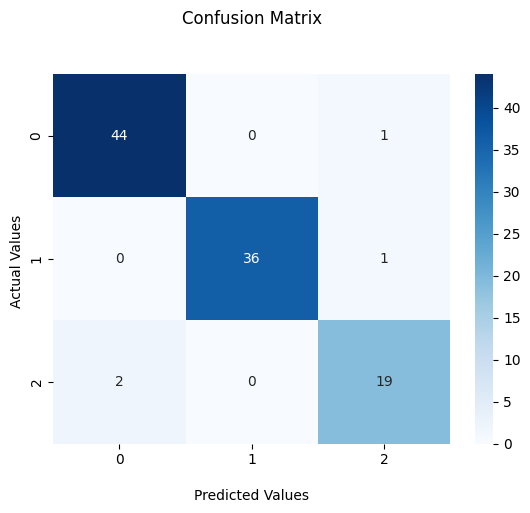

In [267]:
calculate_metrics(model_knn, 'KNN', X_test_standardized, y_test)

### Drzewo decyzyjne

In [268]:
from sklearn.tree import DecisionTreeClassifier

random_tree = DecisionTreeClassifier()
params_tree = {'max_depth': [1, 2, 3, 5, 10],
                'min_samples_leaf':[1, 3, 5, 10, 20]}
tree_gridsearch = GridSearchCV(random_tree,
                             params_tree,
                             )
tree_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', tree_gridsearch.best_params_)
model_tree_v2 = tree_gridsearch.best_estimator_


Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 3}


In [269]:
model_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_8316\4058567073.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


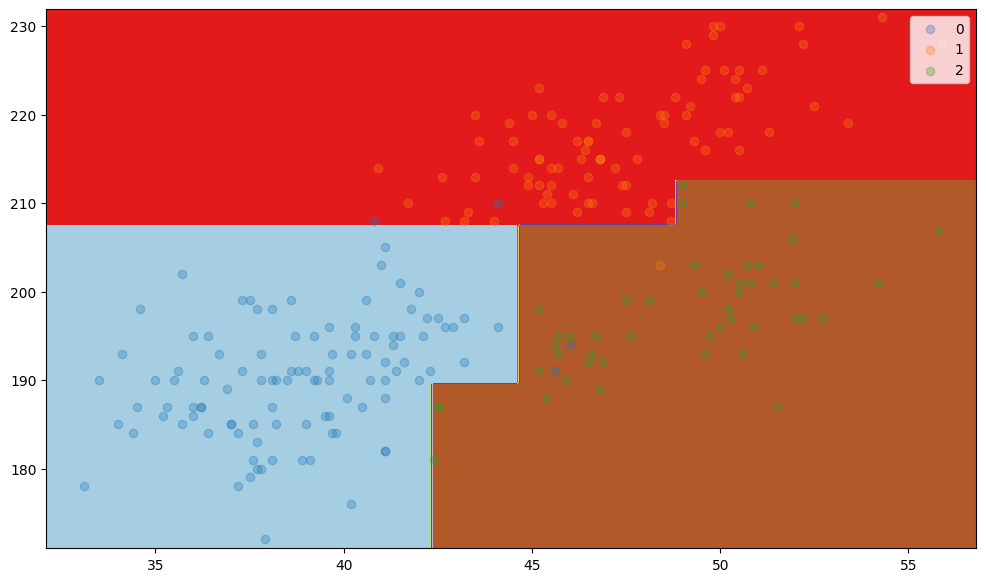

In [296]:
import numpy as np
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_tree)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      0.95      0.97        37
           2       0.86      0.90      0.88        21

    accuracy                           0.95       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103



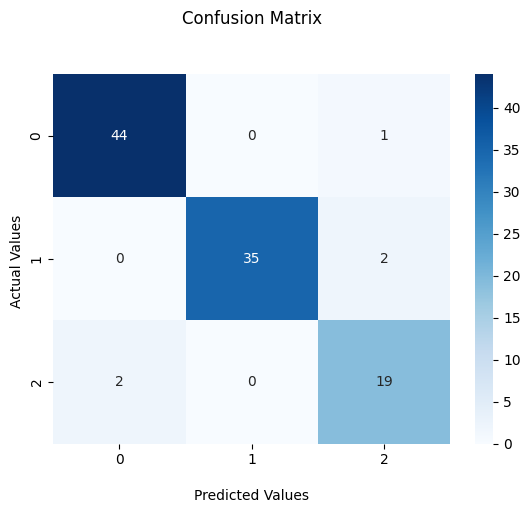

In [297]:
calculate_metrics(model_tree, 'Tree', X_test, y_test)

### SVM (Support Vector Machines) - Maszyna wektorów nośnych

In [301]:
from sklearn.svm import SVC

random_svm = SVC(kernel='rbf', probability=True)
params_svm = {'degree': [1, 2, 3, 5, 10],
                'C':[0.1, 0.3, 0.5, 1.0, 1.3, 1.5]}
svm_gridsearch = GridSearchCV(random_svm,
                             params_svm,
                             )
svm_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', svm_gridsearch.best_params_)
model_svm_v2 = svm_gridsearch.best_estimator_


Best hyperparameter: {'C': 1.5, 'degree': 1}


In [302]:
model_svm = SVC(C=1.5, kernel='rbf', degree=1, probability=True)
model_svm.fit(X_train_standardized, y_train)

SVC(C=1.5, degree=1, probability=True)

C:\Users\magda\AppData\Local\Temp\ipykernel_8316\4058567073.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


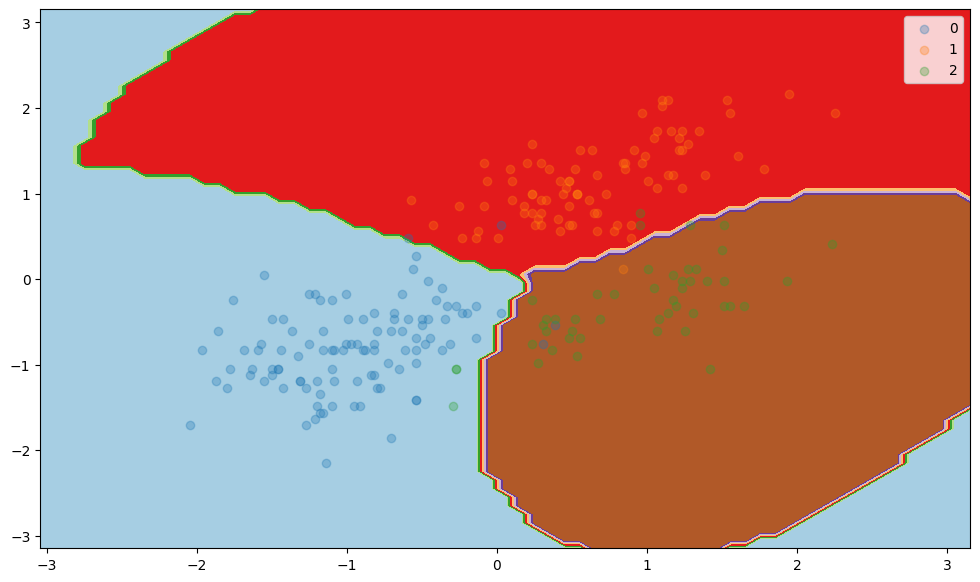

In [303]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_svm)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



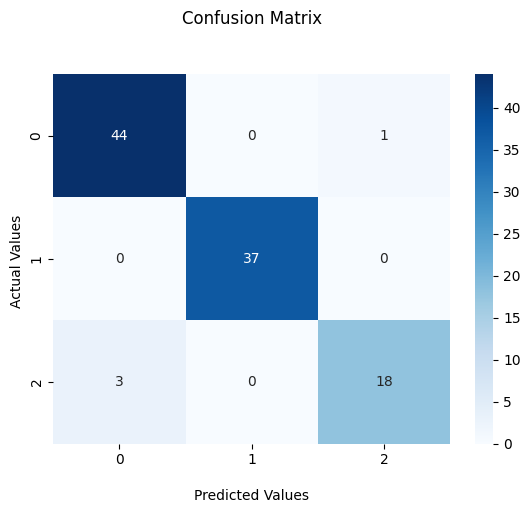

In [304]:
calculate_metrics(model_svm, 'SVM', X_test_standardized, y_test)

### Random Forest – Las drzew decyzyjnych
### Ilość drzew decyzyjnych w RandomForest

In [308]:
from sklearn.ensemble import RandomForestClassifier

random_rfc = RandomForestClassifier()
params_rfc = {'n_estimators': [50, 500, 1000, 1500],
                'max_depth': [1, 3, 5],
                'min_samples_leaf':[1, 3, 5, 10]}
rfc_gridsearch = GridSearchCV(random_rfc,
                             params_rfc,
                             )
rfc_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rfc_gridsearch.best_params_)
model_rfc_v2 = rfc_gridsearch.best_estimator_


Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 500}


In [309]:
model_forest = RandomForestClassifier(n_estimators=500, max_depth=5, 
                min_samples_leaf=1)
model_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=500)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_8316\4058567073.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


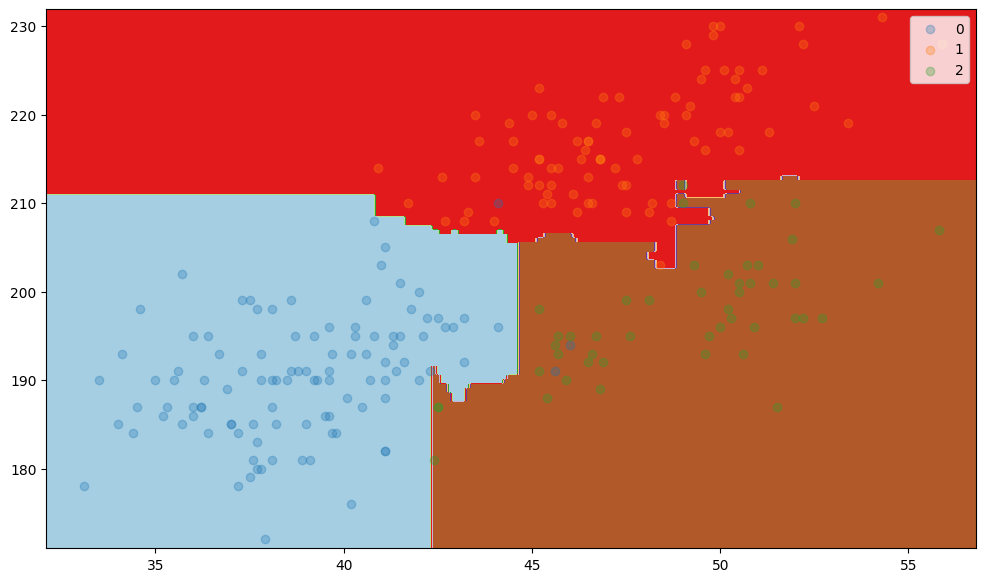

In [310]:
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_forest)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



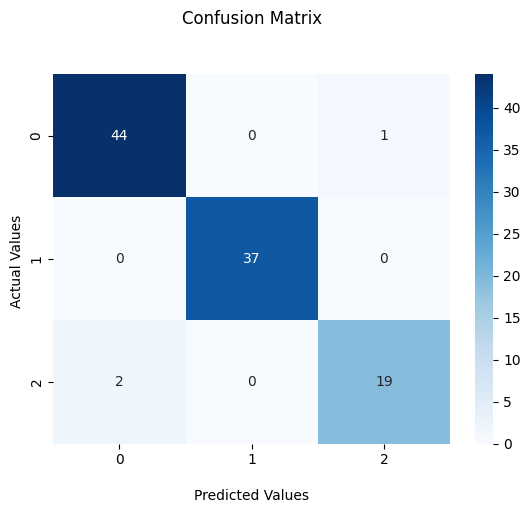

In [311]:
calculate_metrics(model_forest, 'Random Forest', X_test, y_test)

### Boosting - AdaBoost

In [313]:
from sklearn.ensemble import AdaBoostClassifier

random_ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))
params_ab = {'n_estimators': [10, 50, 500, 1000],
                'learning_rate':[0.1, 0.3, 0.5, 1.0, 1.3, 1.5]}
ab_gridsearch = GridSearchCV(random_ab,
                             params_ab,
                             )
ab_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', ab_gridsearch.best_params_)
model_ab_v2 = ab_gridsearch.best_estimator_


Best hyperparameter: {'learning_rate': 0.1, 'n_estimators': 10}


In [315]:
model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                    learning_rate=0.1,n_estimators=10)
model_adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_8316\4058567073.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


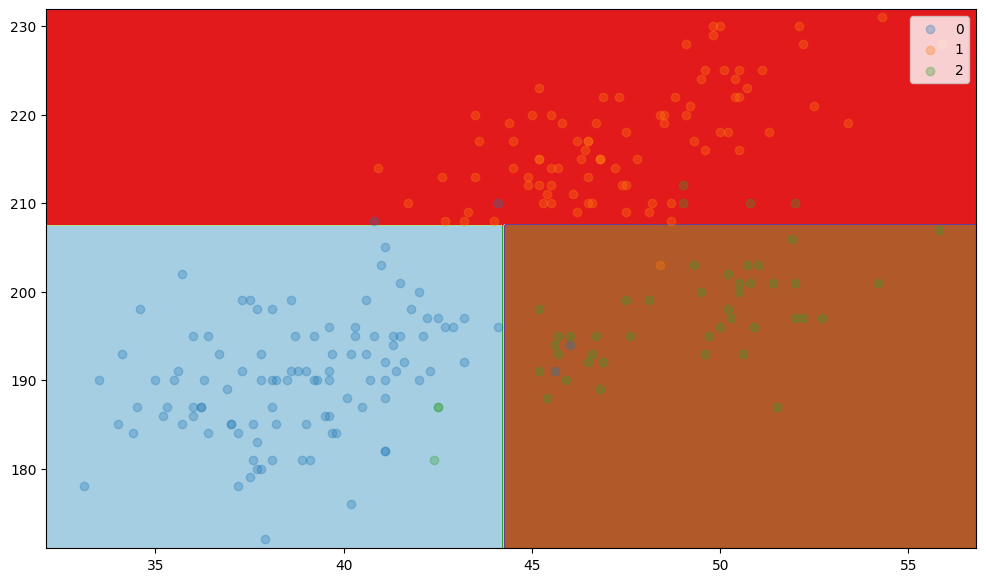

In [323]:
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_adaboost)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      0.97      0.99        37
           2       0.90      0.86      0.88        21

    accuracy                           0.95       103
   macro avg       0.95      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103



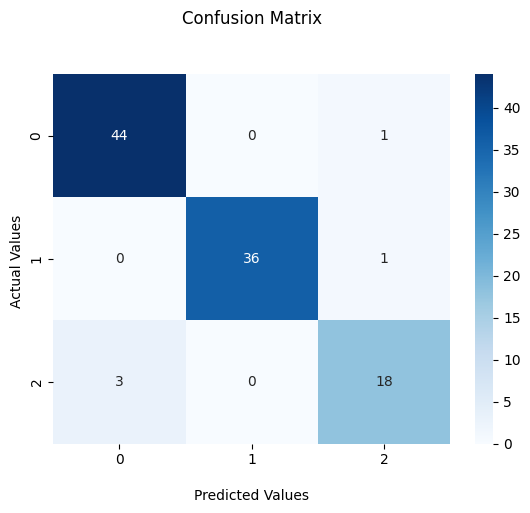

In [324]:
calculate_metrics(model_adaboost, 'AdaBoost test', X_test, y_test)

### Ensembling - Zespół klasyfikatorów

In [318]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost),
                                            ('Logistic Regression', model_lr),
                                            ('Knn', model_knn),
                                            ('SVM', model_svm)],
                                voting='soft')

model_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=3)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=500)),
                             ('AdaBoost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                 learning_rate=0.1,
                                                 n_estimators=10)),
                             ('Logistic Regression', LogisticRegression()),
                             ('Knn', KNeighborsClassifier(n_neighbors=3)),
                             ('SVM', SVC(C=1.5, degree=1, probability=True))],
                 voting='soft')

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature

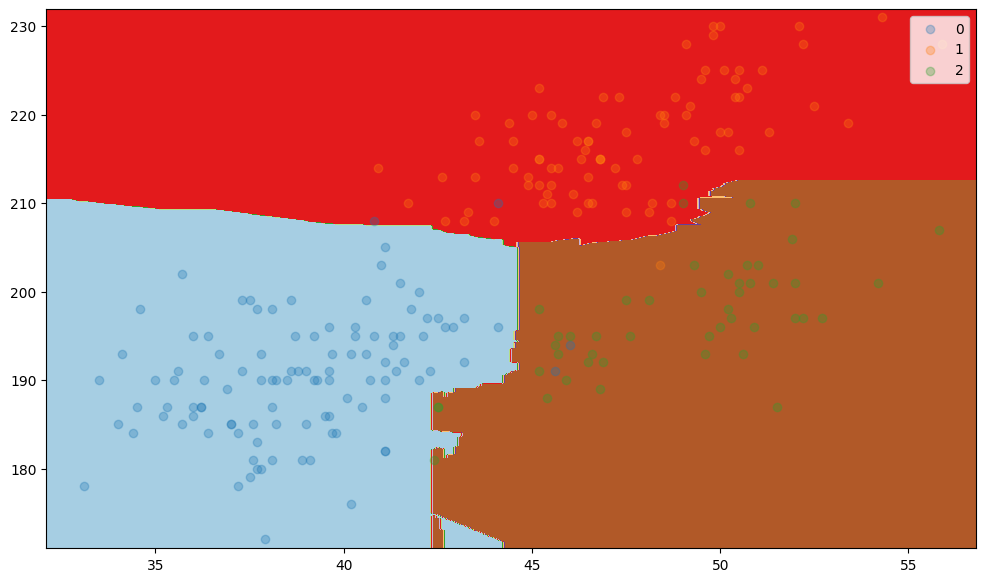

In [319]:
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_voting)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



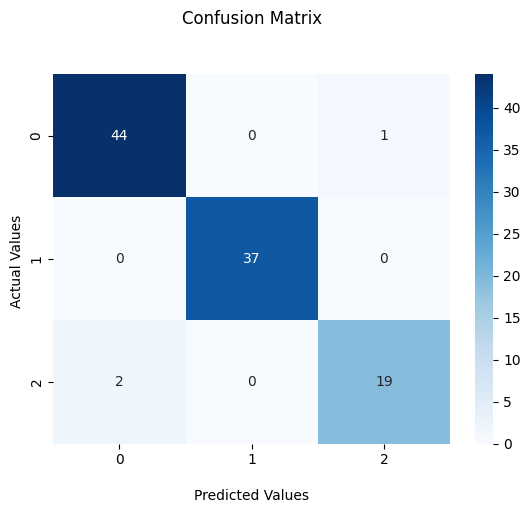

In [320]:
calculate_metrics(model_voting, 'VotingClassifier', X_test, y_test)